# Extraction of Text Files

In [1]:
from os import listdir
import os
from os.path import isfile, join
import string

In [2]:
path = 'C:/Users/Lenovo/Desktop/34/Coding Ninjas/Bayes Naive/20_newsgroups'
folders = [f for f in listdir(path)]

The following is the list name of the of folders present in 20 newsgroup.

In [3]:
folders

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Below we will try to build the pathway to each individual document in our folders.

In [4]:
files = [] #adding the name of the individual classes to our original path
for i in folders:
    all_files = os.path.join(path, i)
    files.append([f for f in listdir(all_files)])

In [5]:
sum(len(files[0]) for i in range(20))

20000

In [6]:
genre = [] #making a list of all the files in all our individual documents 
for i in folders: 
    all_files = join(path, i)
    num_files = len(listdir(all_files))
    for j in range(num_files):
        genre.append(i)

In [7]:
len(genre)

19997

In [8]:
all_pathways = [] #creating a pathway to each individual document
for i in folders:
    file_num = listdir(join(path, i))
    for j in file_num:
        all_pathways.append(os.path.join(path,os.path.join(i,j)))

In [9]:
len(all_pathways)

19997

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(all_pathways, genre,random_state = 0)

# Functions that will be implemented to extract words from text files

Below we have stopwords, which are words that add no meaningful value to the sentence; hence, will be removed from all our sentences

In [12]:
stopwords = ["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at",
             "be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did",
             "didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from",
             "further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers",
             "herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just",
             "ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor",
             "not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s",
             "same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than",
             "that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those",
             "through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't",
             "what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't",
             "y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll",
             "he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd",
             "they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would"
             ,"able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected",
             "affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among",
             "amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere",
             "apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully",
             "b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind",
             "believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes",
             "certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different",
             "done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending",
             "enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex",
             "except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth",
             "found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone",
             "got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi",
             "hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance",
             "important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep",
             "keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly",
             "least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks",
             "ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg",
             "might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay"
             ,"nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next",
             "nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain",
             "obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise",
             "outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed",
             "please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously"
             ,"primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather",
             "rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related",
             "relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say",
             "saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent",
             "seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly",
             "similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime",
             "sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop",
             "strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking",
             "tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered",
             "therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre",
             "think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took",
             "toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless",
             "unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using",
             "usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed",
             "welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby",
             "wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll",
             "whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt",
             "www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate",
             "appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently",
             "consider","considering","corresponding","course","currently","definitely","described","despite","entirely",
             "exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated",
             "indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly",
             "sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder","n't","m"]
len(stopwords)

787

As the document will use alot of punctuations, captilization, stopwords, and tabs, we will use the following function to make our words list more clean and accurate. We will be using the translate function as this allows us to delete characters not required in the list by the third argument. We will also we using .lower() to nomralize our words.

In [13]:
#helps in the extraction of words
def preprocess(words):
    
    #first, we normalize the cases of our words
    words = [word.lower() for word in words]
    #then, we will remove all the stopwords present in our document
    words = [word for word in words if not word in stopwords]
    #then we will try to filter out some  unnecessary data like tabs, punctuations, etc.
    table = str.maketrans('', '', '\t')
    words = [word.translate(table) for word in words]
    table = str.maketrans('', '', string.punctuation) #string.punctuations refer to !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~
    words = [word.translate(table) for word in words]
    #some white spaces may be added to the list of words, due to the translate function & nature of our documents
    #we remove them below
    words = [str for str in words if str]
    #we will also remove just-numeric strings as they do not have any significant meaning in text classification
    words = [word for word in words if not word.isdigit()]
    #we will also remove words with only 2 characters
    words = [word for word in words if len(word) > 2]
    #after removal of so many characters it may happen that some strings have become blank, we remove those
    words = [str for str in words if str]  
    return words


In [14]:
#this function removes all the meta-data on the top of each text file which refers to subject line etc. 
def remove_metadata(lines):
    for i in range(len(lines)):
        if(lines[i] == '\n'):
            start = i+1
            break
    return lines[start:]


In [15]:
def tokenize_sentence(line):
    words = line[0:len(line)-1].strip().split(" ")
    return preprocess(words)

In [16]:

def tokenize(path):
    #load document as a list of lines
    f = open(path, 'r')
    text_lines = f.readlines()
    text_lines = remove_metadata(text_lines)
    words = []
    for line in text_lines:
        words.append(tokenize_sentence(line))
    #words is a 2D list each list representing a single document 
    return words


In [17]:
def flatten(doc_words):
    return [val for sublists in doc_words for val in sublists] #flattens our 2D file

# Using the Above Functions to Calculate the Number of Words in all the Texts

In [18]:
len(folders)

20

By using document in X_train which is a list of paths of the files, we will find the list of words present in our train document. 

In [19]:
def list_of_words(X_train):
    list_of_words=[]
    for document in X_train:
        list_of_words.append(flatten(tokenize(document)))
    return list_of_words, flatten(list_of_words)

In [20]:
list_of_words_train, flattened_list_train = list_of_words(X_train)

In [21]:
len(list_of_words_train)

14997

In [22]:
len(flattened_list_train)

1666923

# Using the Above Data and Finding Out the Frequencies of Different Words

In [23]:
import numpy as np

In [24]:
words = np.asarray(flattened_list_train)
unique, count = np.unique(words, return_counts = True) #gets all theunique words in the list

In [25]:
len(unique)

141230

In [26]:
count_sort_ind = np.argsort(-count)

In [27]:
points = np.arange(len(unique))
counts = count[count_sort_ind]
words = unique[count_sort_ind]

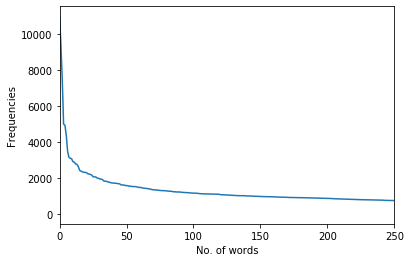

In [81]:
import matplotlib.pyplot as plt
plt.xlim(0,250)
plt.plot(points,counts)
plt.xlabel('No. of words')
plt.ylabel('Frequencies')
plt.show()

We will now be using the 5000 most frequent words from this data that we found.

In [29]:
#we form the dictionary through this whcih tells us the freqency of each word. 
def dictionary(list_of_words):
    dictionary = {}
    num = 1
    for words in list_of_words:
        np_words = np.asarray(words)
        w,c = np.unique(np_words, return_counts = True)
        dictionary[num] = {}
        for i in range(len(w)):
            dictionary[num][w[i]] = c[i]
        num += 1
    return dictionary

In [30]:
#here we find the frequency of each word in the dictionary in X 
def words_in_doc(features, dictionary):
    X = []
    for words in dictionary.keys():
        feature_of_word = dictionary[words].keys()
        row = []
        for feature in features:
            if feature in feature_of_word:
                row.append(dictionary[words][feature])
            else:
                row.append(0)
        X.append(row)
    return X

In [31]:
features = words[0:5000] #take 5000 most repeated words. 
dic = dictionary(list_of_words_train) #gives us dic
Y_train = np.asarray(Y_train)
X_train = np.asarray(words_in_doc(features, dic)) #gives us X_train

In [32]:
X_train.shape,Y_train.shape

((14997, 5000), (14997,))

Now we will try to do the same for test dataset as well

In [33]:
list_of_words_test, flattened_list_test = list_of_words(X_test)

In [34]:
len(list_of_words_test), len(flattened_list_test)

(5000, 578932)

In [35]:
dic_test = dictionary(list_of_words_test)
Y_test = np.asarray(Y_test)
X_test = np.asarray(words_in_doc(features, dic_test))

In [36]:
X_test.shape,Y_test.shape

((5000, 5000), (5000,))

# SkLearn Multinomial Solution

In [37]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [38]:
Y_predict = clf.predict(X_test)
clf.score(X_test, Y_test)

0.769

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,Y_predict))
print(confusion_matrix(Y_test,Y_predict))

                          precision    recall  f1-score   support

             alt.atheism       0.61      0.75      0.67       233
           comp.graphics       0.61      0.69      0.65       253
 comp.os.ms-windows.misc       0.75      0.66      0.70       249
comp.sys.ibm.pc.hardware       0.66      0.72      0.69       240
   comp.sys.mac.hardware       0.73      0.77      0.75       236
          comp.windows.x       0.79      0.74      0.77       240
            misc.forsale       0.80      0.71      0.75       261
               rec.autos       0.79      0.83      0.81       269
         rec.motorcycles       0.82      0.89      0.86       284
      rec.sport.baseball       0.89      0.91      0.90       248
        rec.sport.hockey       0.87      0.94      0.90       231
               sci.crypt       0.94      0.87      0.90       233
         sci.electronics       0.76      0.70      0.72       244
                 sci.med       0.90      0.85      0.88       256
         

In [40]:
Y_pred = clf.predict(X_train)
clf.score(X_train, Y_train)

0.8343001933720078

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_train,Y_pred))
print(confusion_matrix(Y_train,Y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.71      0.86      0.78       767
           comp.graphics       0.70      0.79      0.74       747
 comp.os.ms-windows.misc       0.82      0.78      0.80       751
comp.sys.ibm.pc.hardware       0.77      0.80      0.78       760
   comp.sys.mac.hardware       0.81      0.87      0.84       764
          comp.windows.x       0.88      0.80      0.84       760
            misc.forsale       0.86      0.82      0.84       739
               rec.autos       0.89      0.89      0.89       731
         rec.motorcycles       0.85      0.94      0.90       716
      rec.sport.baseball       0.94      0.94      0.94       752
        rec.sport.hockey       0.90      0.95      0.92       769
               sci.crypt       0.92      0.90      0.91       767
         sci.electronics       0.85      0.78      0.81       756
                 sci.med       0.93      0.88      0.91       744
         

# Performing Text Classification by writing Multinomial Naive Bayes by Scratch


In [67]:
#this function forms our dictionary which tells us the frequency of each word in each class, and total words in the document and class.
def fit(X, Y, features):
    dictionary = {}
    dictionary['total_data'] = len(flatten(X))
    keys = set(Y)
    for doc_name in keys:
        dictionary[doc_name] = {}
        usable_cases = (Y == doc_name)
        X_cases = X[usable_cases]
        dictionary[doc_name]['total_count'] = len(flatten(X_cases))
        for case in range(1, X.shape[1]):
            dictionary[doc_name][features[case - 1]] = X_cases[:, case - 1].sum()
    return dictionary

In [57]:
#probability of each class using laplace correction 
def probability(x, curr_class, dic):
    output = np.log(dic[curr_class]["total_count"]) - np.log(dic["total_data"])
    for j in range(len(x) - 1):
        if x[j] in dic[curr_class].keys():
            xj = x[j]
            count_curr_class_equal_xj = dic[curr_class][xj] + 1
            count_curr_class = dic[curr_class]["total_count"] + len(dic[curr_class].keys())
            curr_xj_prob = np.log(count_curr_class_equal_xj) - np.log(count_curr_class)
            output += curr_xj_prob
    return output


In [58]:
#this helps in deciding the most accurate class. 
def predictSinglePoint(x, dic):
    classes = dic.keys()
    best_prob = -1000
    best_class = -1
    first_run = True
    for i in classes:
        if i == "total_data":
            continue
        p_curr_class = probability(x, i, dic)
        if((first_run) or (p_curr_class > best_prob)):
            best_prob = p_curr_class
            best_class = i
            first_run = False
    return (best_class)

In [59]:
def predict(dic, X):
    y_pred = []
    for x in X:
        prob = predictSinglePoint(x, dic)
        y_pred.append(prob)
    return y_pred

In [68]:
dic = fit(X_train, Y_train, features)

In [76]:
X_test = []

for i in dic_test:
    X_test.append(list(dic_test[i].keys()))
#tells us all the words present in each document in X_test

In [70]:
Y_pred = predict(dic, X_test)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.64      0.63      0.63       233
           comp.graphics       0.49      0.65      0.56       253
 comp.os.ms-windows.misc       0.85      0.32      0.47       249
comp.sys.ibm.pc.hardware       0.64      0.63      0.63       240
   comp.sys.mac.hardware       0.92      0.46      0.61       236
          comp.windows.x       0.61      0.75      0.67       240
            misc.forsale       0.84      0.43      0.57       261
               rec.autos       0.80      0.49      0.61       269
         rec.motorcycles       0.99      0.47      0.64       284
      rec.sport.baseball       0.97      0.65      0.78       248
        rec.sport.hockey       0.80      0.86      0.83       231
               sci.crypt       0.62      0.84      0.71       233
         sci.electronics       0.76      0.41      0.53       244
                 sci.med       0.93      0.68      0.79       256
         